<a href="https://colab.research.google.com/github/EverlineChea/Data-Science-Project/blob/main/Beverage_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sebastianwillmann/beverage-sales")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'beverage-sales' dataset.
Path to dataset files: /kaggle/input/beverage-sales


In [9]:

import os

print(os.listdir("/kaggle/input/beverage-sales"))

df = pd.read_csv('/kaggle/input/beverage-sales/synthetic_beverage_sales_data.csv')


['synthetic_beverage_sales_data.csv']


In [10]:
df.shape

(8999910, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [12]:
df.head(10)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23
5,ORD2,CUS2847,B2C,Sauvignon Blanc,Alcoholic Beverages,9.09,2,0.00,18.18,Schleswig-Holstein,2023-03-16
6,ORD3,CUS1806,B2B,Tomato Juice,Juices,2.14,44,0.10,84.74,Hamburg,2022-11-20
7,ORD3,CUS1806,B2B,Vittel,Water,0.43,13,0.05,5.31,Hamburg,2022-11-20
8,ORD3,CUS1806,B2B,San Pellegrino,Water,1.21,92,0.10,100.19,Hamburg,2022-11-20
9,ORD3,CUS1806,B2B,Evian,Water,1.38,3,0.05,3.93,Hamburg,2022-11-20


In [13]:
# reducing the dataset rows
# changing date format and creating a year column
df_small = df.sample(500_000)
df = df_small
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Year'] = df['Order_Date'].dt.year
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 521879 to 8819050
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Order_ID       500000 non-null  object        
 1   Customer_ID    500000 non-null  object        
 2   Customer_Type  500000 non-null  object        
 3   Product        500000 non-null  object        
 4   Category       500000 non-null  object        
 5   Unit_Price     500000 non-null  float64       
 6   Quantity       500000 non-null  int64         
 7   Discount       500000 non-null  float64       
 8   Total_Price    500000 non-null  float64       
 9   Region         500000 non-null  object        
 10  Order_Date     500000 non-null  datetime64[ns]
 11  Order_Year     500000 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(6)
memory usage: 47.7+ MB


In [14]:
#total sales per year
Total_Volumes_sales_per_year =df.groupby(['Order_Year'])[['Quantity','Total_Price']].sum().sort_values('Total_Price', ascending = False)
Total_Volumes_sales_per_year

,Quantity,Total_Price
Order_Year,,
2023,3851416,22501341.49
2022,3869629,21733134.54
2021,3832224,20889448.29


In [15]:
Total_sales_per_year = df.groupby(['Order_Year','Customer_Type'])[['Total_Price','Quantity']].sum()
Total_sales_per_year

Total_Price  Quantity
Order_Year Customer_Type                       
2021       B2B            15897212.92   2969975
           B2C             4992235.37    862249
2022       B2B            16702884.85   3014307
           B2C             5030249.69    855322
2023       B2B            17198974.49   2991900
           B2C             5302367.00    859516

/tmp/ipython-input-1981212948.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


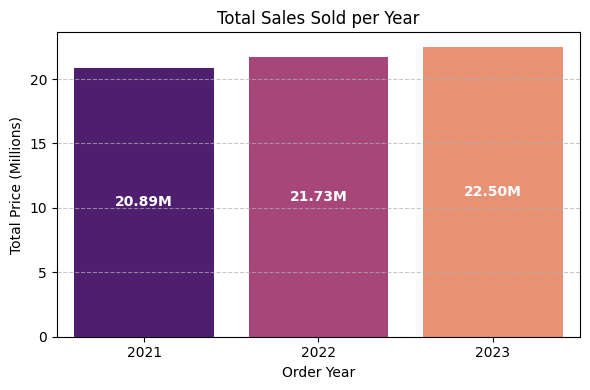

In [16]:
#plotting sales in a year

# Create a new column scaled in millions
Total_Volumes_sales_per_year['Total_Price_M'] = Total_Volumes_sales_per_year['Total_Price'] / 1_000_000

plt.figure(figsize=(6, 4))
barplot = sns.barplot(
    x=Total_Volumes_sales_per_year.index,
    y='Total_Price_M',
    data=Total_Volumes_sales_per_year,
    palette='magma'
)

# Add labels inside the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        x=p.get_x() + p.get_width() / 2,
        y=height / 2,  # halfway inside the bar
        s=f'{height:.2f}M',
        ha='center',
        va='center',  # vertical center
        color='white',  # white text stands out on dark bars
        fontweight='bold'
    )

plt.title('Total Sales Sold per Year')
plt.xlabel('Order Year')
plt.ylabel('Total Price (Millions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1222824629.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


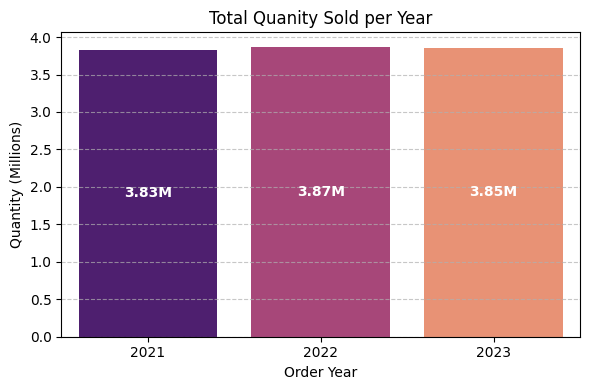

In [17]:
# Total volumes
# Create a new column scaled in millions
Total_Volumes_sales_per_year['Quantity_M'] = Total_Volumes_sales_per_year['Quantity'] / 1_000_000

plt.figure(figsize=(6, 4))
barplot = sns.barplot(
    x=Total_Volumes_sales_per_year.index,
    y='Quantity_M',
    data=Total_Volumes_sales_per_year,
    palette='magma'
)

# Add labels inside the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        x=p.get_x() + p.get_width() / 2,
        y=height / 2,  # halfway inside the bar
        s=f'{height:.2f}M',
        ha='center',
        va='center',  # vertical center
        color='white',  # white text stands out on dark bars
        fontweight='bold'
    )

plt.title('Total Quanity Sold per Year')
plt.xlabel('Order Year')
plt.ylabel('Quantity (Millions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
# sales per month to see trends month on month for each year
df['Order_Month'] = df['Order_Date'].dt.strftime('%b')
# Define correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert to categorical so sorting respects calendar order
df['Order_Month'] = pd.Categorical(df['Order_Month'], categories=month_order, ordered=True)
sales_per_month = df.groupby(['Order_Month','Order_Year'])['Total_Price'].sum()

contribution_per_month = (sales_per_month / sales_per_month.sum()) * 100
pivot_table = contribution_per_month.unstack().round(2)
pivot_table

/tmp/ipython-input-2194502200.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_per_month = df.groupby(['Order_Month','Order_Year'])['Total_Price'].sum()


Order_Year,2021,2022,2023
Order_Month,,,
Jan,2.74,2.77,2.91
Feb,2.60,2.49,2.81
Mar,2.84,2.72,2.89
Apr,2.57,2.61,2.92
May,2.65,2.74,2.87
Jun,2.60,2.92,2.87
Jul,2.74,2.91,2.86
Aug,2.54,2.78,2.92
Sep,2.67,2.92,2.90


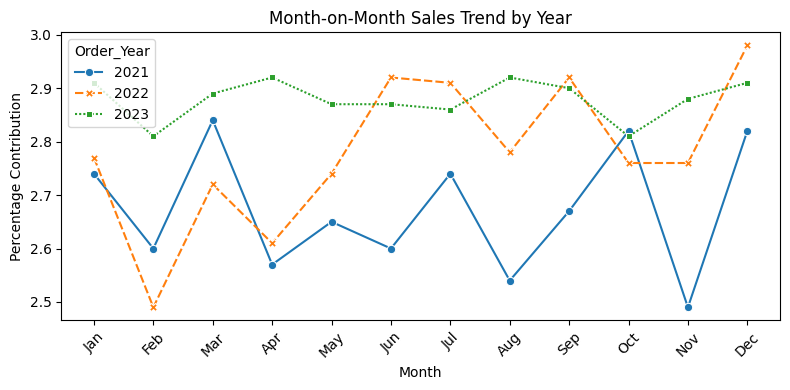

In [19]:
# plotting trends month on month
plt.figure(figsize=(8,4))
sns.lineplot(data=pivot_table, markers=True)
plt.xlabel("Month")
plt.ylabel("Percentage Contribution")
plt.title("Month-on-Month Sales Trend by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
# sales_per_region
sales_per_region = df.groupby(['Region','Order_Year'])['Total_Price'].sum().sort_values( ascending = False)
sales_per_region = sales_per_region.unstack()
sales_per_region

Order_Year,2021,2022,2023
Region,,,
Baden-Württemberg,1195176.91,1238264.60,1351179.72
Bayern,1247190.29,1375447.44,1341964.66
Berlin,1368800.66,1340161.55,1394656.65
Brandenburg,1177455.57,1391016.04,1390893.78
Bremen,1176889.37,1175041.17,1214378.18
Hamburg,1491358.24,1429688.98,1499349.61
Hessen,1336139.40,1478530.52,1598162.29
Mecklenburg-Vorpommern,1371096.01,1344259.22,1401735.60
Niedersachsen,1280080.21,1299996.77,1454613.00


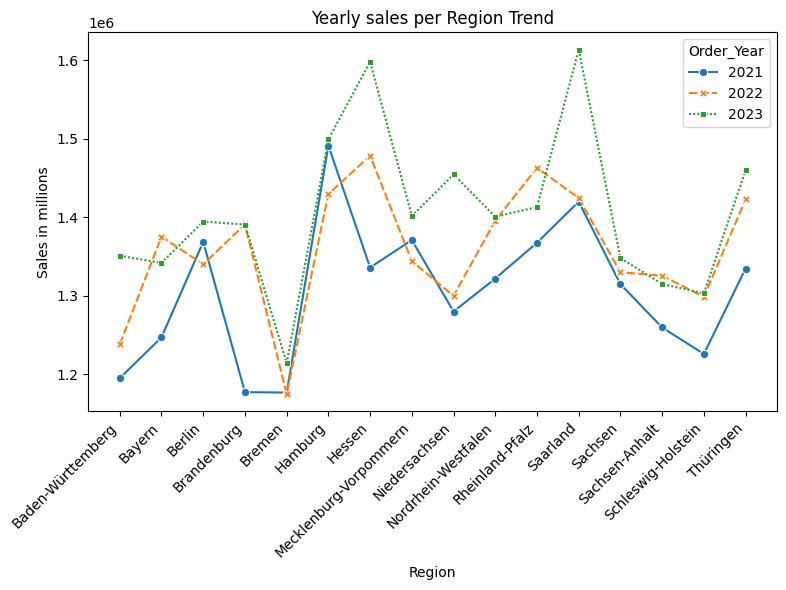

In [32]:
# plotting trends region by year
plt.figure(figsize=(8,6))
sns.lineplot(data=sales_per_region, markers=True)
plt.xlabel("Region")
plt.ylabel("Sales in millions")
plt.title("Yearly sales per Region Trend")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
# sales by brand per region
Sales_by_brand_per_region = df.groupby(['Region','Category'])['Total_Price'].sum()
Sales_by_brand_per_region= Sales_by_brand_per_region.unstack()
Sales_by_brand_per_region

Category,Alcoholic Beverages,Juices,Soft Drinks,Water
Region,,,,
Baden-Württemberg,2896613.78,441938.49,279207.34,166861.62
Bayern,3090261.33,436451.10,273183.07,164706.89
Berlin,3185747.46,462025.45,281181.54,174664.41
Brandenburg,3071999.02,444272.98,277535.90,165557.49
Bremen,2646270.45,472699.87,273393.96,173944.44
Hamburg,3398834.85,509957.94,321130.25,190473.79
Hessen,3465858.81,483242.10,290488.27,173243.03
Mecklenburg-Vorpommern,3190649.80,466980.63,287756.17,171704.23
Niedersachsen,3131943.23,451190.55,284110.91,167445.29


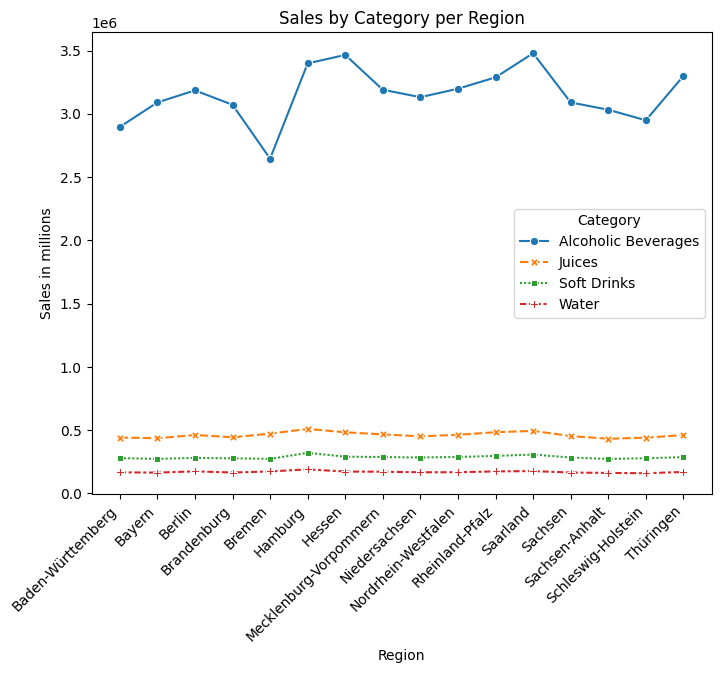

In [42]:
# chat showing sales by category by Region
plt.figure(figsize=(8,6))
sns.lineplot(data = Sales_by_brand_per_region,markers=True)
plt.xlabel('Region')
plt.ylabel('Sales in millions')
plt.title('Sales by Category per Region')
plt.xticks(rotation = 45, ha= 'right')
plt.show()